In [73]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [74]:
housing_dt=pd.read_csv('AmesHousing.csv')

housing_dt.drop(['Misc Feature','Misc Val','Screen Porch','Alley','Pool Area','Pool QC','Fence','Misc Feature'],axis=1,inplace=True)

housing_dt.dropna()









,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,...,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,IR1,Lvl,AllPub,...,P,210,62,0,0,5,2010,WD,Normal,215000
5,6,527105030,60,RL,78.0,9978,Pave,IR1,Lvl,AllPub,...,Y,360,36,0,0,6,2010,WD,Normal,195500
15,16,527216070,60,RL,47.0,53504,Pave,IR2,HLS,AllPub,...,Y,503,36,0,0,6,2010,WD,Normal,538000
17,18,527258010,20,RL,88.0,11394,Pave,Reg,Lvl,AllPub,...,Y,113,0,0,0,6,2010,New,Partial,394432
19,20,527302110,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,...,Y,349,0,0,0,2,2010,WD,Normal,210000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2900,2901,916477010,20,RL,95.0,13618,Pave,Reg,Lvl,AllPub,...,Y,172,38,0,0,11,2006,New,Partial,320000
2901,2902,921205030,20,RL,88.0,11443,Pave,Reg,Lvl,AllPub,...,Y,326,66,0,0,3,2006,New,Partial,369900
2902,2903,921205050,20,RL,88.0,11577,Pave,Reg,Lvl,AllPub,...,Y,161,225,0,0,9,2006,New,Partial,359900
2915,2916,923227100,20,RL,80.0,13384,Pave,Reg,Lvl,AllPub,...,Y,160,0,0,0,5,2006,WD,Normal,140000


In [75]:

# Identify categorical columns
categorical_columns = housing_dt.select_dtypes(include=['object']).columns
print("Categorical columns:", categorical_columns)



Categorical columns: Index(['MS Zoning', 'Street', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Roof Style', 'Roof Matl',
       'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type', 'Exter Qual',
       'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
       'BsmtFin Type 1', 'BsmtFin Type 2', 'Heating', 'Heating QC',
       'Central Air', 'Electrical', 'Kitchen Qual', 'Functional',
       'Fireplace Qu', 'Garage Type', 'Garage Finish', 'Garage Qual',
       'Garage Cond', 'Paved Drive', 'Sale Type', 'Sale Condition'],
      dtype='object')


In [76]:
# One-hot encode categorical columns
housing_dt = pd.get_dummies(housing_dt, columns=categorical_columns)
print(housing_dt)


      Order        PID  MS SubClass  Lot Frontage  Lot Area  Overall Qual  \
0         1  526301100           20         141.0     31770             6   
1         2  526350040           20          80.0     11622             5   
2         3  526351010           20          81.0     14267             6   
3         4  526353030           20          93.0     11160             7   
4         5  527105010           60          74.0     13830             5   
...     ...        ...          ...           ...       ...           ...   
2925   2926  923275080           80          37.0      7937             6   
2926   2927  923276100           20           NaN      8885             5   
2927   2928  923400125           85          62.0     10441             5   
2928   2929  924100070           20          77.0     10010             5   
2929   2930  924151050           60          74.0      9627             7   

      Overall Cond  Year Built  Year Remod/Add  Mas Vnr Area  ...  \
0     

TypeError: Image data of dtype object cannot be converted to float

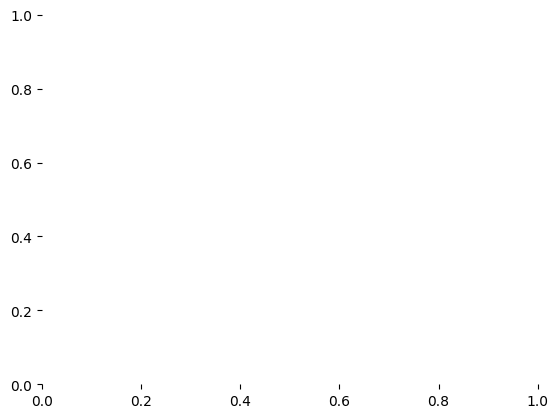